<a href="https://www.kaggle.com/code/luisprezsala/batman?scriptVersionId=90549127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
######## Install Libraries ########
!pip install squarify
!pip install plotly

In [2]:
######## Loading Files ########
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud
import spacy
import plotly.express as px

DATASET_PATH = '../input/sanfranciscopolicedepartmentincidentreports/'
INCIDENTS_FILE = 'Police_Department_Incident_Reports__2018_to_Present.csv'
SCHOOLS_FILE  = 'Schools.csv'
COLLEGES_FILE = 'Schools_College.csv' 

incidents_df = pd.read_csv(DATASET_PATH + INCIDENTS_FILE)
schools_df   = pd.read_csv(DATASET_PATH + SCHOOLS_FILE)
colleges_df  = pd.read_csv(DATASET_PATH + COLLEGES_FILE)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
364024,2020-01-01,2020/01/01,00:00,2020,Wednesday,2020-02-19 07:00:00,90443972000,904439,190629803,192372426.0,...,-122.397479,POINT (-122.39747873558031 37.718834357405456),88.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
414730,2020-01-01,2020/01/01,00:00,2020,Wednesday,2020-04-22 14:06:00,92130664070,921306,200254144,201131818.0,...,-122.412547,POINT (-122.41254705065515 37.746824998777896),83.0,NaN,NaN,NaN,3.0,NaN,2.0,9.0
87443,2020-01-01,2020/01/01,00:00,2020,Wednesday,2021-12-30 14:00:00,110745964070,1107459,210863440,213642117.0,...,-122.391374,POINT (-122.39137353346597 37.77283099431839),34.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
517116,2020-01-01,2020/01/01,00:00,2020,Wednesday,2020-06-27 13:59:00,93907606372,939076,206099271,NaN,...,-122.388738,POINT (-122.38873799945695 37.76304827811293),55.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
461080,2020-01-01,2020/01/01,00:00,2020,Wednesday,2020-03-03 14:10:00,90907968030,909079,200160262,200632310.0,...,-122.392723,POINT (-122.39272283486896 37.78868666104212),32.0,1.0,NaN,NaN,NaN,NaN,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533463,2020-12-31,2020/12/31,00:00,2020,Thursday,2021-01-01 15:33:00,99207706244,992077,210001349,210012022.0,...,-122.502031,POINT (-122.5020311786853 37.73551490812246),40.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0
498840,2020-12-31,2020/12/31,00:00,2020,Thursday,2021-01-02 15:24:00,99275406374,992754,216000177,NaN,...,-122.435563,POINT (-122.43556332140828 37.7724179289558),26.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
538116,2020-12-31,2020/12/31,00:00,2020,Thursday,2021-01-19 09:36:00,99804306244,998043,216006959,NaN,...,-122.423413,POINT (-122.42341305643612 37.79573710834212),102.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
542339,2020-12-31,2020/12/31,00:00,2020,Thursday,2021-01-01 15:39:00,99275205073,992752,210000880,NaN,...,-122.475924,POINT (-122.47592409365181 37.76174715066737),109.0,NaN,NaN,NaN,NaN,NaN,7.0,10.0


126995


,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
Incident Datetime,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2021.0,1.038389e+11,1.038388e+06,2.127773e+08,2.124400e+08,30008.375000,2.542700e+07,5.391304,37.768992,-122.431060,64.380952,1.0,1.0,NaN,3.000000,NaN,6.608696,5.565217
2021-01-01 00:01:00,2021.0,1.043685e+11,1.043685e+06,2.130805e+08,2.122008e+08,27350.222222,2.354444e+07,7.444444,37.743873,-122.436480,55.500000,NaN,1.0,NaN,5.000000,NaN,5.000000,6.333333
2021-01-01 00:02:00,2021.0,9.954721e+10,9.954720e+05,2.160035e+08,NaN,6244.000000,2.794900e+07,4.000000,37.762285,-122.506059,39.000000,NaN,NaN,NaN,NaN,NaN,7.000000,10.000000
2021-01-01 00:05:00,2021.0,1.044947e+11,1.044946e+06,2.104082e+08,2.118025e+08,71000.000000,2.326200e+07,4.000000,37.744681,-122.481181,40.000000,NaN,NaN,NaN,NaN,NaN,7.000000,10.000000
2021-01-01 00:20:00,2021.0,9.919166e+10,9.919165e+05,2.100001e+08,2.100101e+08,12882.250000,2.783150e+07,4.500000,37.786598,-122.406985,64.000000,NaN,1.0,1.0,NaN,NaN,6.500000,5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 22:27:00,2021.0,1.108481e+11,1.108481e+06,2.162076e+08,NaN,6244.000000,2.670500e+07,2.000000,37.804146,-122.425110,17.000000,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000
2021-12-30 22:30:00,2021.0,1.113394e+11,1.113394e+06,2.197702e+08,2.201274e+08,20322.500000,2.704200e+07,7.250000,37.768267,-122.409178,59.250000,NaN,NaN,1.0,2.333333,NaN,6.250000,2.750000
2021-12-30 22:56:00,2021.0,1.107569e+11,1.107569e+06,2.108642e+08,2.136431e+08,15161.000000,2.659500e+07,5.000000,37.783083,-122.434350,97.000000,NaN,NaN,NaN,NaN,NaN,11.000000,4.000000


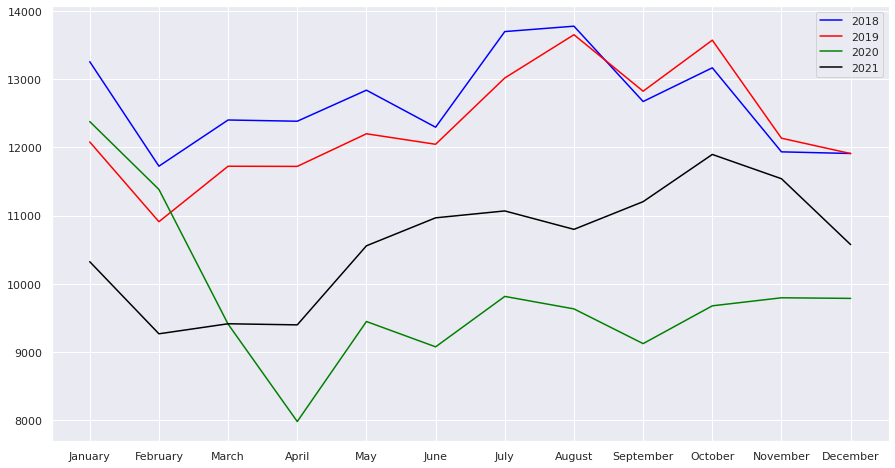

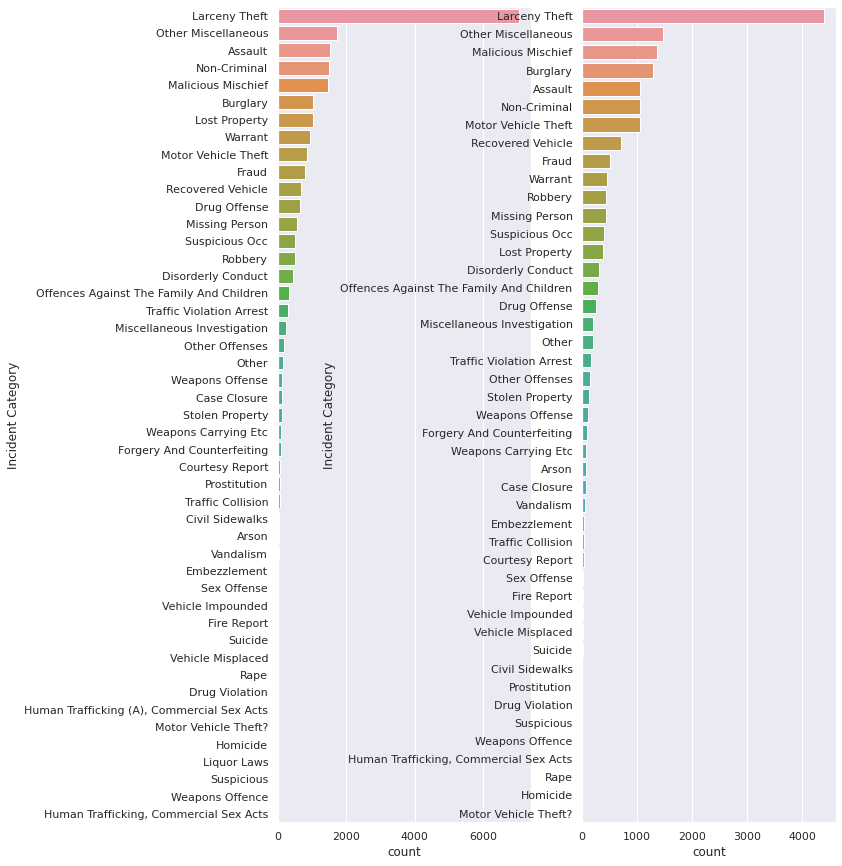

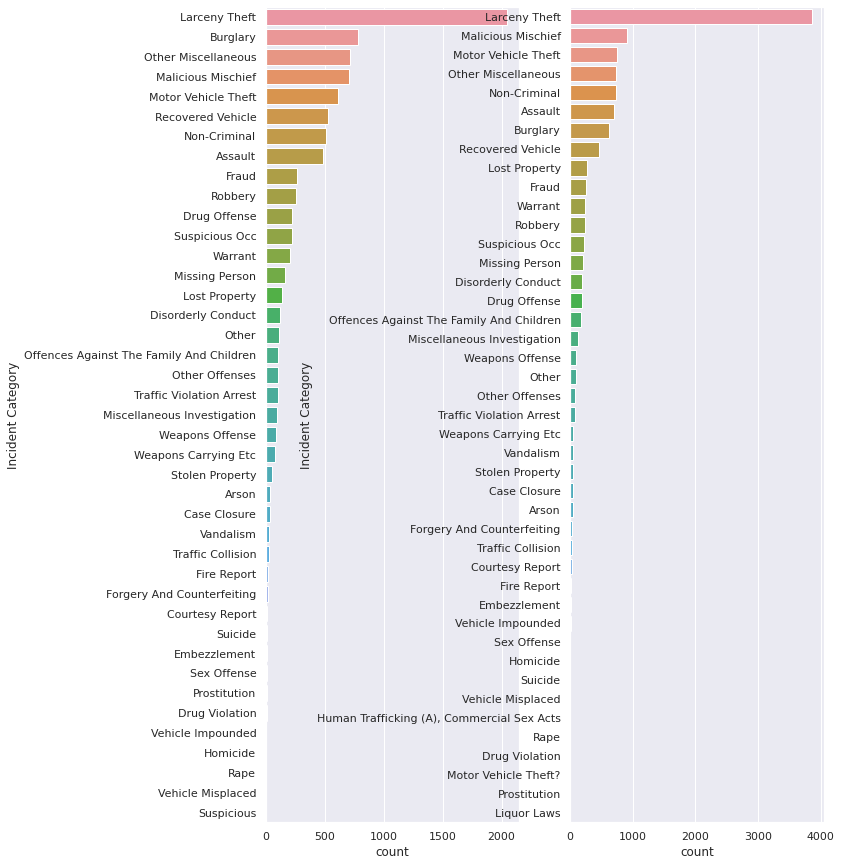

In [3]:
incidents_df['Incident Datetime'] = pd.to_datetime(incidents_df['Incident Datetime'])
incidents_df['Report Datetime'] = pd.to_datetime(incidents_df['Report Datetime'])
incidents_df = incidents_df.sort_values('Incident Datetime')

incidents_2018 = incidents_df[incidents_df['Incident Datetime'].between('2018-01-01', '2018-12-31')]
incidents_2019 = incidents_df[incidents_df['Incident Datetime'].between('2019-01-01', '2019-12-31')]
incidents_2020 = incidents_df[incidents_df['Incident Datetime'].between('2020-01-01', '2020-12-31')]
incidents_2021 = incidents_df[incidents_df['Incident Datetime'].between('2021-01-01', '2021-12-31')]
incidents_2022 = incidents_df[incidents_df['Incident Datetime'].between('2022-01-01', '2022-12-31')]

# incidents_2022.groupby(by=[incidents_2022.index.month,incidents_2022.index.year])
monthly_2018 = incidents_2018.groupby(incidents_2018['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2019 = incidents_2019.groupby(incidents_2019['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2020 = incidents_2020.groupby(incidents_2020['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2021 = incidents_2021.groupby(incidents_2021['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()
monthly_2022 = incidents_2022.groupby(incidents_2022['Incident Datetime'].dt.strftime('%B'))['Incident Datetime'].count()

display(incidents_2020)

months_sorted = sorted(monthly_2021.keys(), key=lambda day: datetime.strptime(day, "%B"))

test_2018 = [] 
test_2019 = []
test_2020 = []
test_2021 = []
test_2022 = []

for month in months_sorted:
    test_2018.append(monthly_2018[month])
    test_2019.append(monthly_2019[month])
    test_2020.append(monthly_2020[month])
    test_2021.append(monthly_2021[month])
#     if monthly_2022[month]: test_2022.append(monthly_2022[month])

sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(15,8)})

sns.lineplot(x=months_sorted, y=test_2018, color='blue', legend='brief', label=str('2018'))
sns.lineplot(x=months_sorted, y=test_2019, color='red', legend='brief', label=str('2019'))
sns.lineplot(x=months_sorted, y=test_2020, color='green',  legend='brief', label=str('2020'))
sns.lineplot(x=months_sorted, y=test_2021, color='black',  legend='brief', label=str('2021'))


############ COVID ############
covid_epoch = incidents_2020[incidents_2020['Incident Datetime'].between('2020-03-01', '2020-05-01')]
not_covid_epoch = incidents_2019[incidents_2019['Incident Datetime'].between('2019-03-01', '2019-05-01')]

covid_order = pd.Categorical(covid_epoch['Incident Category'].value_counts().index)
not_covid_order = pd.Categorical(not_covid_epoch['Incident Category'].value_counts().index)

sns.set(rc={'figure.figsize':(10,15)})
fig, ax =plt.subplots(1,2)
sns.countplot(data=not_covid_epoch, y="Incident Category", order = not_covid_order, ax=ax[0])
sns.countplot(data=covid_epoch, y="Incident Category", order = covid_order, ax=ax[1])

############ SUMMER ############
october_epoch = incidents_2021[incidents_2021['Incident Datetime'].between('2021-02-01', '2021-02-28')]
february_epoch = incidents_2021[incidents_2021['Incident Datetime'].between('2021-10-01', '2021-10-31')]

october_order = pd.Categorical(october_epoch['Incident Category'].value_counts().index)
february_order = pd.Categorical(february_epoch['Incident Category'].value_counts().index)

fig, ax =plt.subplots(1,2)
sns.countplot(data=october_epoch, y="Incident Category", order = october_order, ax=ax[0])
sns.countplot(data=february_epoch, y="Incident Category", order = february_order, ax=ax[1])

print(incidents_2021['Incident Datetime'].count())
# incidents_2021['Incident Datetime'].plot()
incidents_2021.groupby(['Incident Datetime']).mean()

# Revisaremos la correlación de los datasets utilizando matrices de correlación:
1. Police Departmen Incidents
2. Schools College
3. Schools

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566245 entries, 216240 to 12211
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   Incident Datetime                                     566245 non-null  datetime64[ns]
 1   Incident Date                                         566245 non-null  object        
 2   Incident Time                                         566245 non-null  object        
 3   Incident Year                                         566245 non-null  int64         
 4   Incident Day of Week                                  566245 non-null  object        
 5   Report Datetime                                       566245 non-null  datetime64[ns]
 6   Row ID                                                566245 non-null  int64         
 7   Incident ID                                           566245 

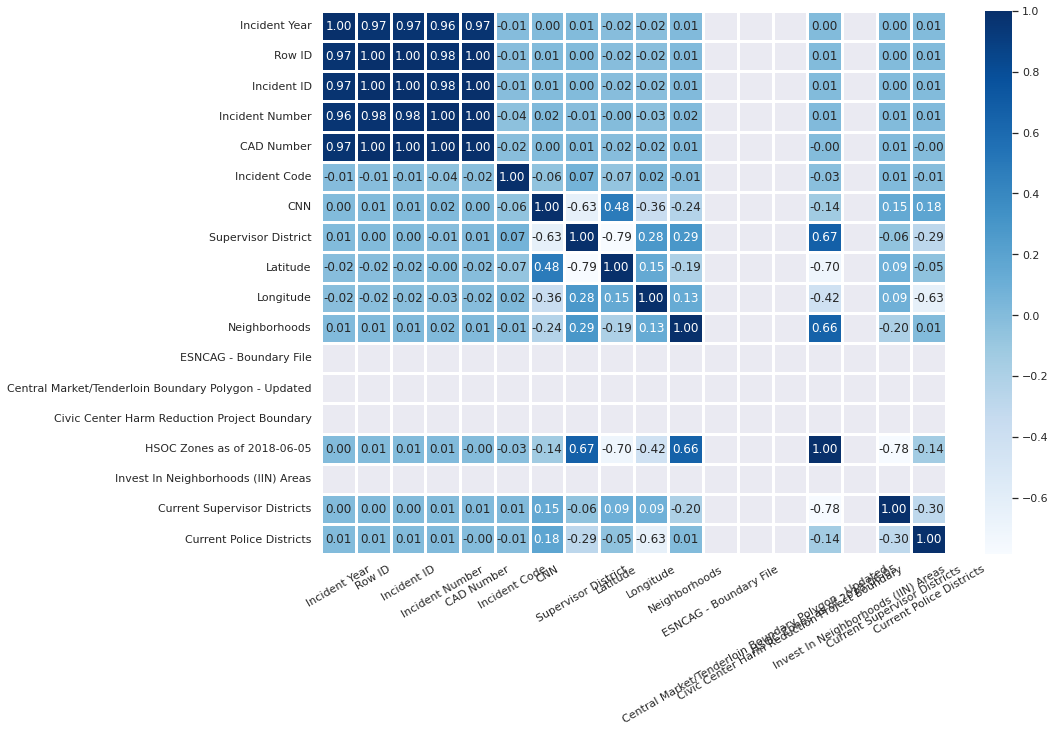

In [4]:
print(incidents_df.info())
#print(schools_df.info())
#print(colleges_df.info())


incidents = incidents_df.copy()#[['Platform', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Platform']).sum()
#platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)[:10]  # Nos quedamos con el Top 10
#for col in ['Report Type Description', 'Incident Category', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Police District']:
#    incidents[col] = incidents[col].astype('category')

incidents.drop(columns = ['Incident Datetime','Incident Date', 'Incident Time', 'Incident Day of Week', 'Report Datetime', 'Report Type Code', 'Report Type Description', 'Filed Online', 'Incident Category', 'Incident Subcategory', 'Incident Description', 'Resolution', 'Intersection', 'Police District', 'Analysis Neighborhood', 'Point'], axis = 1, inplace=True)
plt.figure(figsize=(14, 10))
sns.heatmap(incidents.corr('spearman'), annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()

# Diagrama de Arbol de las "Categorías de Crimen" mas frecuentes

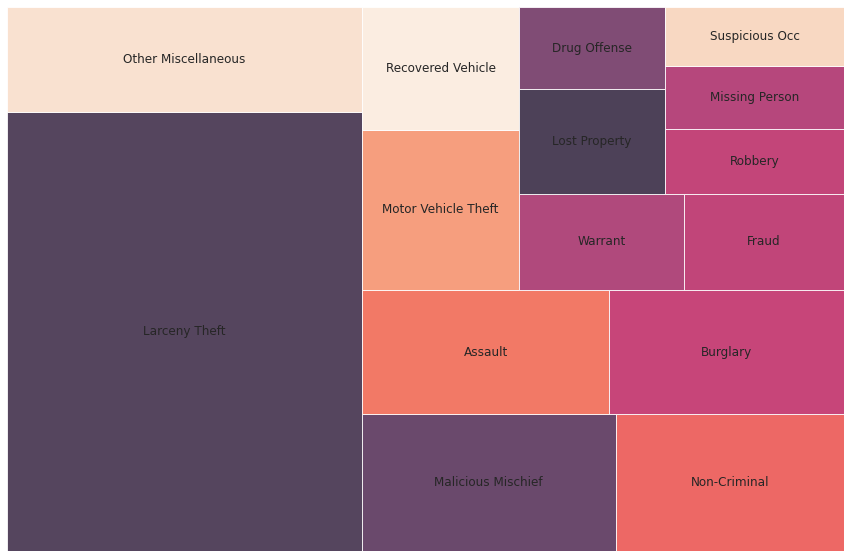

In [5]:
incidents_category = incidents_df['Incident Category'].value_counts()[:15].copy()

plt.figure(figsize=(15,10))
squarify.plot(sizes=incidents_category.values, label=incidents_category.index, alpha=.8)
plt.axis('off')
plt.show()

# Diagrama de Arbol de las "Subcategorías de Crimen" mas frecuentes

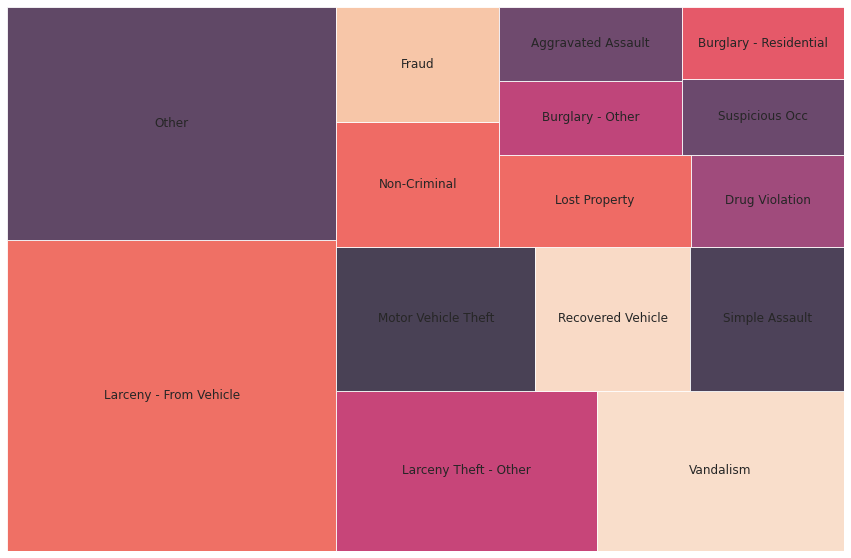

In [6]:
incidents_category = incidents_df['Incident Subcategory'].value_counts()[:15].copy()

plt.figure(figsize=(15,10))
squarify.plot(sizes=incidents_category.values, label=incidents_category.index, alpha=.8)
plt.axis('off')
plt.show()

# Nube de palabras para análizar las descripciones de los incidentes reportados

In [7]:
nlp = spacy.load('en_core_web_sm') # Utilizamo el SM porque no se puede cargar el Medium

list_words = [x.split() for x in incidents_df['Incident Description'].values]  # Obtenemos todas las palabras individuales para cada nombre
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Las juntamos todas en un único texto
list_words = list_words[:1000000]

corpus = nlp(list_words)  # Procesamos las palabras con SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Eliminamos espacios en blanco y signos de puntuación
corpus = ' '.join(tokens)  # Ya tenemos la lista de palabras limpia

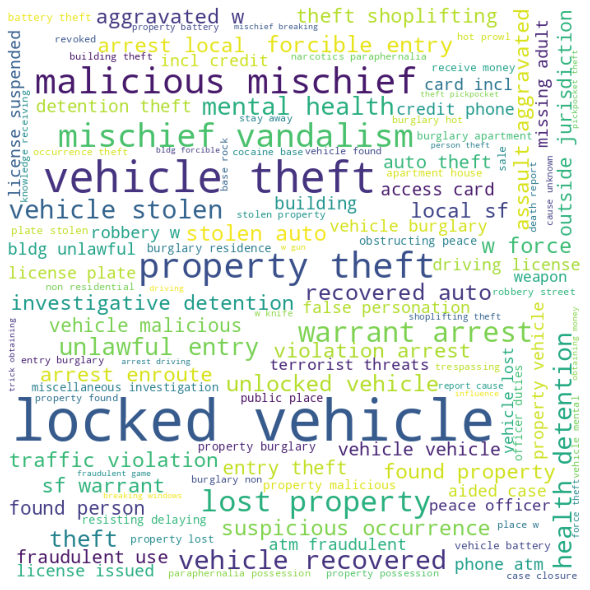

In [8]:
wordcloud = WordCloud(width=700, height=700, background_color='white', min_font_size=10).generate(corpus)
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

## Calculamos el tiempo promedio de reporte por categoría de incidente

In [9]:
# sacar la proporcion de incidentes resueltos y no resueltos.
# Calcular el tiempo promedio de reporte de un incidente y ver si tiene algún sentido.
# obtenemos la diferencia de tiempo entre la fecha de reporte y la fecha del incidente.
incidents_df['Difference Date'] = abs(incidents_df['Incident Datetime'] - incidents_df['Report Datetime'])

## Tiempo promedio de reporte
Este es el top 15 de las categorías de incidentes que más demoran en reportarse.

Con este análisis tenemos que el tráfico de humanos ha demorado más en reportarse. Hay que considerar que en el dataset solo se cuenta con un registro.

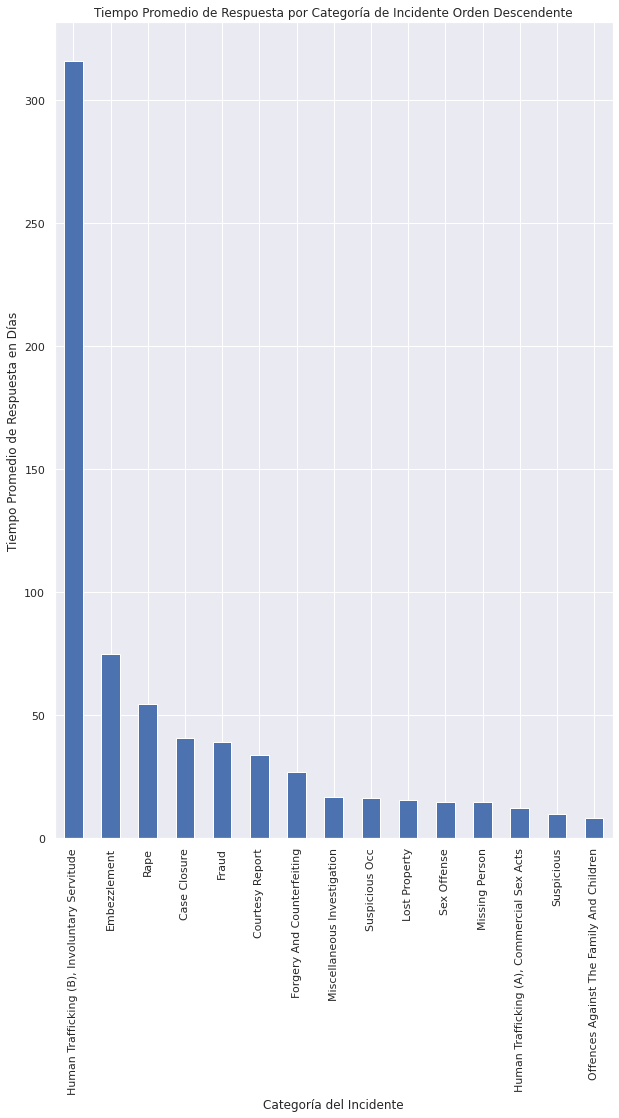

In [10]:


df_Test = incidents_df.groupby('Incident Category')['Difference Date'].mean().sort_values(ascending = False)[:15].astype('timedelta64[h]') / 24
df_Test.plot(kind = 'bar', title = 'Tiempo Promedio de Respuesta por Categoría de Incidente Orden Descendente', rot = 90)

plt.xlabel('Categoría del Incidente')
plt.ylabel('Tiempo Promedio de Respuesta en Días')
plt.show()

Este es el top 15 de las categorías de incidentes que más rápido se reportan.

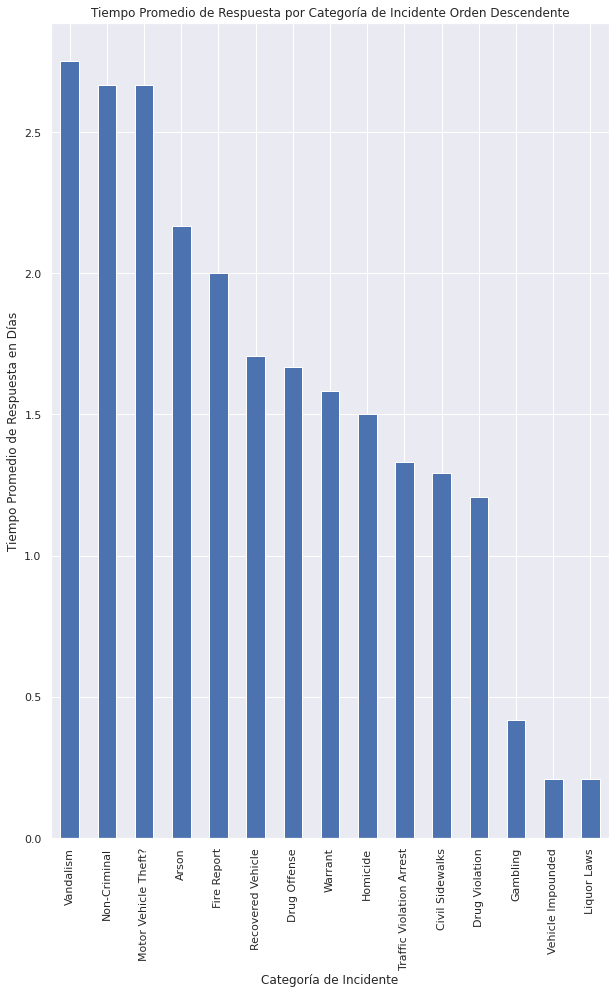

In [11]:
df_Test = incidents_df.groupby('Incident Category')['Difference Date'].mean().sort_values()[:15].sort_values(ascending = False).astype('timedelta64[h]') / 24
df_Test.plot(kind = 'bar', title = 'Tiempo Promedio de Respuesta por Categoría de Incidente Orden Descendente', rot = 90)

plt.xlabel('Categoría de Incidente')
plt.ylabel('Tiempo Promedio de Respuesta en Días')
plt.show()